In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [17]:
data=pd.read_csv(r"C:\Users\Msi\Desktop\final\Housing.csv")
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
df=pd.DataFrame(data)

df=pd.get_dummies(df)
df = df.replace({True: 1, False: 0})
X=df.drop(columns=["price"])
Y=df["price"]
scaler=StandardScaler()
x_scaled = scaler.fit_transform(X)



C:\Users\Msi\AppData\Local\Temp\ipykernel_17732\331740716.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [18]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [19]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(X)
y=np.array(Y).reshape(-1,1)
y_scaled=scaler.fit_transform(y)


x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2)


In [20]:
print(f"x_trian shape = {x_train.shape}\nx_test shape = {x_test.shape}\ny_train shape = {y_train.shape}\ny_test shape ={y_test.shape}")


x_trian shape = (436, 20)
x_test shape = (109, 20)
y_train shape = (436, 1)
y_test shape =(109, 1)


In [21]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, PRINT=False, gradient_type='batch', alpha=0.1):
        """
        Parameters:
        - learning_rate: hyperparmeter (0.01 | 0.001 | 0.1)
        - num_iterations: the number of loops for optimizer
        - PRINT: boolean to print the progress
        - gradient_type: string to choose the gradient descent type (batch/stochastic)
        - alpha: Regularization strength (λ in ridge regression)
                Set alpha=0 for no regularization
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.PRINT = PRINT
        self.gradient_type = gradient_type
        self.alpha = alpha 
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def initialize_parameters(self, features_num):   # Xavier initialization
        self.weights = np.random.randn(features_num,1) * np.sqrt(1/features_num)  
        self.bias = 0
        
    def sigmoid(self, z):# activation function
        return 1/(1+np.exp(-z))
    
    def linear(self, X): # compute the linear part
        return np.dot(X, self.weights) + self.bias
    
    def compute_cost(self, X, y, epsilon=1e-15):        # epsilon to prevent log errors
        m = X.shape[0]  # number of training examples
        
        predictions = self.sigmoid(self.linear(X))
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        
        # loss normal
        cross_entropy = (-1/m) * np.sum((predictions-y)**2)
        
        # Ridge regularization term (L2 penalty)
        regularization = (self.alpha/(2*m)) * np.sum(self.weights**2)
        
        return cross_entropy + regularization
        
    def BGD(self, X, y):
        
        m = X.shape[0]
        
        for i in range(self.num_iterations):
            #forward pass
            A = self.sigmoid(self.linear(X))
            
            #back pass
            dZ = A - y
            dW = (1/m) * np.dot(X.T, dZ) + (self.alpha/m) * self.weights
            db = (1/m) * np.sum(dZ)
            
            #update weights
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db
            
            #track progress
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)      
            
            if self.PRINT and i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost}")
            
    def SGD(self, X, y):
        m = X.shape[0]
        for i in range(self.num_iterations):
            for j in range(m):
                #choose the sample
                xi = X[j:j+1]
                yi = y[j:j+1]
                
                #forward pass
                a = self.sigmoid(self.linear(xi))
                
                #back pass
                dz = a - yi
                dw = np.dot(xi.T, dz) + (self.alpha/m) * self.weights
                db = np.sum(dz)
                
                #update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            #calculate performance
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)
            
            if self.PRINT and i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost}")
    
    def fit(self, X, y):
        #ensure there is no dimensional errors
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        m, n = X.shape
        
        #generate w,b
        self.initialize_parameters(n)
        
        #use  the provided  gradient type
        if self.gradient_type == 'batch':
            self.BGD(X, y)
        elif self.gradient_type == 'stochastic':
            self.SGD(X, y)
            
    def predict(self, X, threshold=0.5):
        # classify according to a threshold
        z = self.linear(X)
        output = self.sigmoid(z)
        print(output)
    

In [22]:
# Convert y_test to numpy array and ensure it's 1D
y_test = np.array(y_test).flatten()

# Create and train models
models = {
    "Batch (no reg)": LinearRegression(PRINT= True, gradient_type='batch', alpha=0),
    "Stochastic (no reg)": LinearRegression(PRINT = True ,gradient_type='stochastic', alpha=0),
    "Batch (L2 reg)": LinearRegression(PRINT = True, gradient_type='batch', alpha=0.1),
    "Stochastic (L2 reg)": LinearRegression(PRINT = True, gradient_type='stochastic', alpha=0.1)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    

Training Batch (no reg)...
Iteration 0: Cost = -1.2825513534302049
Iteration 100: Cost = -0.801120447939116
Iteration 200: Cost = -0.7321367348388446
Iteration 300: Cost = -0.716108660702822
Iteration 400: Cost = -0.7115039649810135
Iteration 500: Cost = -0.7102331928242578
Iteration 600: Cost = -0.710079727174423
Iteration 700: Cost = -0.7103212376108017
Iteration 800: Cost = -0.7106993681050076
Iteration 900: Cost = -0.7111162666793318
Training Stochastic (no reg)...
Iteration 0: Cost = -0.71244617869037


C:\Users\Msi\AppData\Local\Temp\ipykernel_17732\3523982697.py:26: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Iteration 100: Cost = -0.723288403736418
Iteration 200: Cost = -0.723479959576967
Iteration 300: Cost = -0.7235460430287238
Iteration 400: Cost = -0.7235748098336943
Iteration 500: Cost = -0.7235894354344942
Iteration 600: Cost = -0.7235976224451398
Iteration 700: Cost = -0.7236024349224003
Iteration 800: Cost = -0.7236053354238086
Iteration 900: Cost = -0.7236071076629331
Training Batch (L2 reg)...
Iteration 0: Cost = -1.4639147929281504
Iteration 100: Cost = -0.7970442803691546
Iteration 200: Cost = -0.7221671337808283
Iteration 300: Cost = -0.708676196722434
Iteration 400: Cost = -0.7055011240058003
Iteration 500: Cost = -0.7048141780926758
Iteration 600: Cost = -0.7047013257772419
Iteration 700: Cost = -0.7046069908280224
Iteration 800: Cost = -0.7043662359296428
Iteration 900: Cost = -0.7039352474272639
Training Stochastic (L2 reg)...
Iteration 0: Cost = -0.7106482903831989
Iteration 100: Cost = 10.273941215433783
Iteration 200: Cost = 38.8594431132741
Iteration 300: Cost = 80.331

In [23]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

# Linear Regression (no solver/penalty needed)
model_BGD = LinearRegression()  # Simple OLS regression

# SGD Regression (for large datasets)
model_SGD = SGDRegressor(
    max_iter=10000,
    loss='squared_error',  # For regression
    alpha=0.001,           # Regularization strength
    learning_rate='adaptive',
    eta0=0.01,             # Initial learning rate
    penalty='l2',          # L2 regularization
    random_state=42  )

In [24]:
# Typically better approach - don't scale targets
model_BGD.fit(x_train, y_train)  # Use original y values
y_pred_batch = model_BGD.predict(x_test)
loss_BGD = mean_squared_error(y_test, y_pred_batch)
print(f"MSE of Batch Gradient Descent: {loss_BGD:.4f}")

# Stochastic Gradient Descent (SGD)
model_SGD.fit(x_train, y_train)
y_pred_SGD = model_SGD.predict(x_test)
loss_SGD = mean_squared_error(y_test, y_pred_SGD)
print(f"MSE of Stochastic Gradient Descent: {loss_SGD:.4f}")

MSE of Batch Gradient Descent: 0.3185
MSE of Stochastic Gradient Descent: 0.3183


C:\Users\Msi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Coefficients: {ridge.coef_}")
print(f"Intercept: {ridge.intercept_}")

Mean Squared Error: 0.3184
Coefficients: [ 0.28954779  0.04189816  0.26836926  0.2101667   0.13012731 -0.03001029
  0.03001029 -0.03487669  0.03487669 -0.0584128   0.0584128  -0.04422281
  0.04422281 -0.112308    0.112308   -0.06223698  0.06223698  0.01785138
  0.03640161 -0.05489627]
Intercept: [0.0044203]


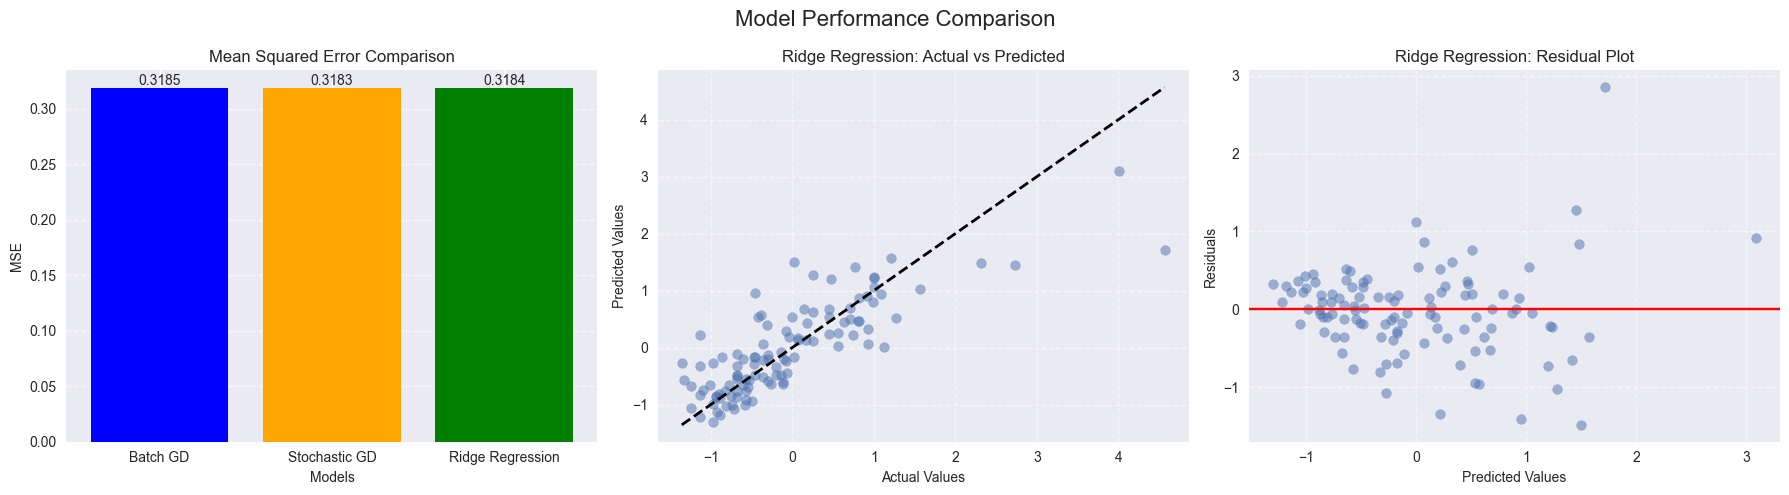

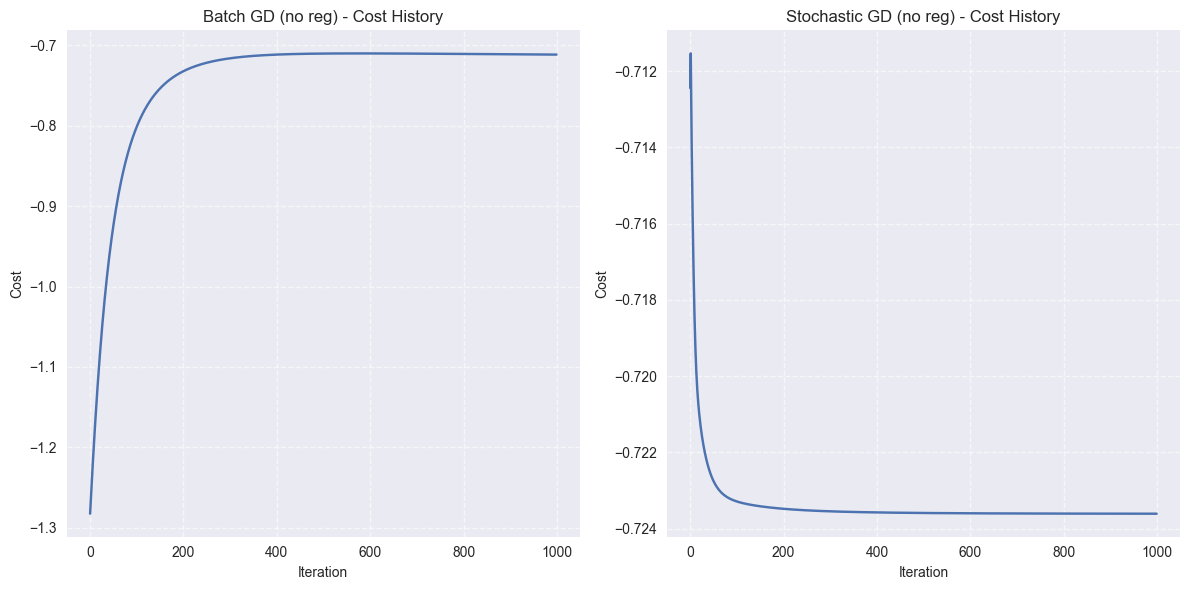

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

plt.style.use('seaborn-v0_8')

# Create a figure with multiple subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Performance Comparison', fontsize=16)

# 1. Bar plot comparing MSE values
mse_values = [loss_BGD, loss_SGD, mse]
models_mse = ['Batch GD', 'Stochastic GD', 'Ridge Regression']

bars = ax1.bar(models_mse, mse_values, color=['blue', 'orange', 'green'])
ax1.set_title('Mean Squared Error Comparison', fontsize=12)
ax1.set_xlabel('Models', fontsize=10)
ax1.set_ylabel('MSE', fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontsize=10)

# 2. Scatter plot of actual vs predicted values for Ridge Regression
ax2.scatter(y_test, y_pred, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_title('Ridge Regression: Actual vs Predicted', fontsize=12)
ax2.set_xlabel('Actual Values', fontsize=10)
ax2.set_ylabel('Predicted Values', fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.6)

# 3. Residual plot for Ridge Regression
residuals = y_test - y_pred.reshape(-1)
ax3.scatter(y_pred, residuals, alpha=0.5)
ax3.axhline(y=0, color='r', linestyle='-')
ax3.set_title('Ridge Regression: Residual Plot', fontsize=12)
ax3.set_xlabel('Predicted Values', fontsize=10)
ax3.set_ylabel('Residuals', fontsize=10)
ax3.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Additional visualization: Cost history for the custom models
plt.figure(figsize=(12, 6))

# Plot cost history for Batch GD (no regularization)
plt.subplot(1, 2, 1)
plt.plot(models["Batch (no reg)"].cost_history)
plt.title('Batch GD (no reg) - Cost History', fontsize=12)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Cost', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Plot cost history for Stochastic GD (no regularization)
plt.subplot(1, 2, 2)
plt.plot(models["Stochastic (no reg)"].cost_history)
plt.title('Stochastic GD (no reg) - Cost History', fontsize=12)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Cost', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()